In [1]:
# required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from pickle import load,dump

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("./Data/train.csv")
df.head()

,col1,col2,output
0,-38.366669,113.000000,1
1,-39.818572,123.943369,1
2,-55.638240,114.551862,1
3,-36.378005,95.616515,1
4,-39.366669,112.000000,1


In [3]:
df.dtypes

col1      float64
col2      float64
output      int64
dtype: object

In [4]:
df.isnull().any()

col1      False
col2      False
output    False
dtype: bool

In [5]:
df['output'].value_counts()/len(df)

1    0.602504
0    0.397496
Name: output, dtype: float64

In [6]:
# deviding independent and independent
x = df.drop('output',axis=1)
y = df.output

<AxesSubplot:xlabel='col1', ylabel='col2'>

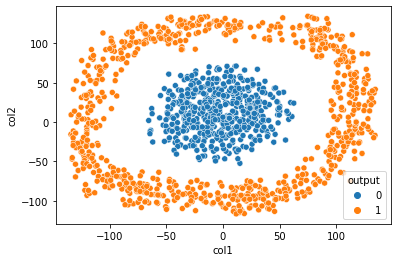

In [7]:
sns.scatterplot(x='col1',y='col2',hue='output',data=df)

In [8]:
# train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((1022, 2), (1022,), (256, 2), (256,))

In [9]:
# model building
# logestic regression

model_lr = LogisticRegression()
model_lr.fit(x_train,y_train)
y_pred = model_lr.predict(x_test)

In [10]:
accuracy_score(y_test,y_pred)

0.59765625

In [11]:
# svm with linear kernal

model_svm_lr = SVC(kernel='linear')
model_svm_lr.fit(x_train,y_train)
y_pred = model_svm_lr.predict(x_test)
accuracy_score(y_test,y_pred)

0.59765625

In [12]:
# svm with rbf kernal

model_svm_lr = SVC(kernel='rbf')
model_svm_lr.fit(x_train,y_train)
y_pred = model_svm_lr.predict(x_test)
accuracy_score(y_test,y_pred)

0.6796875

In [13]:
#Saving the Model in Pickle

In [17]:
from sklearn.svm import SVC
   
model = SVC(kernel='rbf')
model.fit(x,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [19]:
dump(model, open('pickle/svc_rbf_model.pkl', 'wb'))

___________
_____________

In [20]:
# Loading pretrained svc with rbf kernal from pickle file
model = load(open('pickle/svc_rbf_model.pkl', 'rb'))

In [53]:
df[df['output']==1].head(2)

,col1,col2,output
0,-38.366669,113.000000,1
1,-39.818572,123.943369,1


In [54]:
x = []
x = input("Enter col1, col2 values: ").split()
x = np.array(x)
x = x.reshape(1,-1)
x

Enter col1, col2 values: -39.818572	123.943369


array([['-39.818572', '123.943369']], dtype='<U10')

In [55]:
result = model.predict(x)
result[0]

1

### Reason for selecting `rbf` kernal

- By looking plot data not linearly separable, logestic regression and support vector machine classifier with `linear` kernal assumes that data is linearly separable so linear models not well perform on this data.
- `rbf` is `Radial Basis Function kernel` this kernal is nonlinear kernel so this kernel performs well this given dataset.

________
__________